In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def display(img,cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

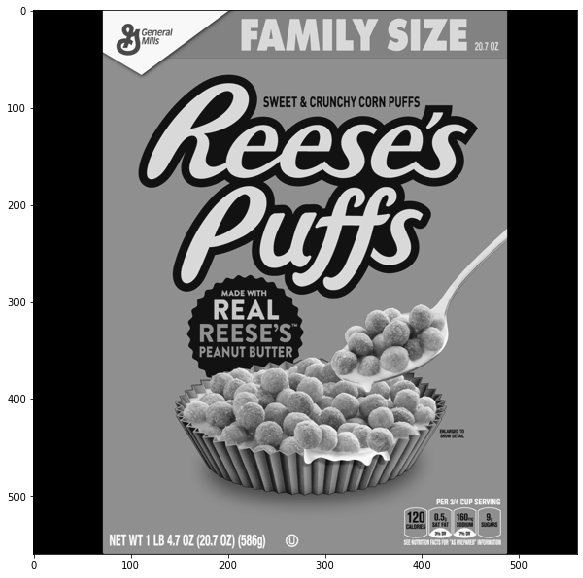

In [3]:
reeses=cv2.imread('DATA/reeses_puffs.png',0)
display(reeses,cmap="gray")

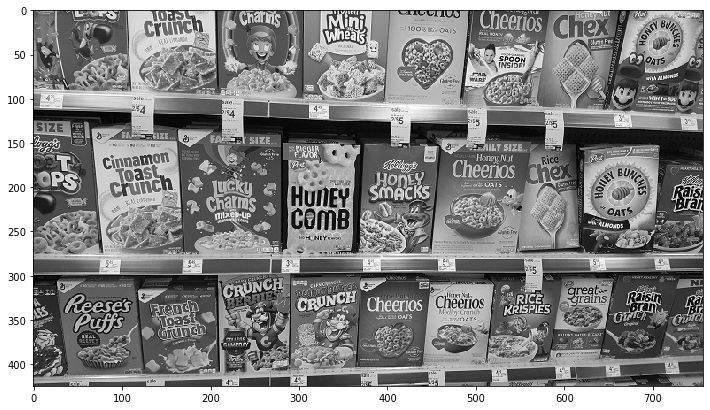

In [4]:
cereals=cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [5]:
orb=cv2.ORB_create()

In [6]:
kp1,des1=orb.detectAndCompute(reeses,None)

In [7]:
kp2,des2=orb.detectAndCompute(cereals,None)

In [8]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches=bf.match(des1,des2)

In [10]:
matches=sorted(matches,key=lambda x:x.distance)

In [11]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2, matches[:25],None,flags=2)

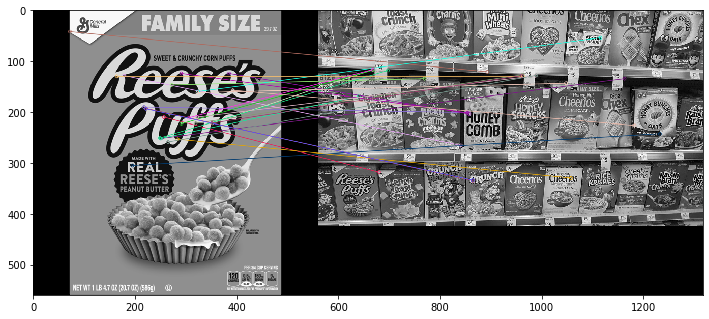

In [12]:
display(reeses_matches)

In [13]:
#sift detectors - scale invariant feature transform
sift=cv2.xfeatures2d.SIFT_create()

In [14]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)


In [15]:
bf=cv2.BFMatcher()

In [16]:
matches=bf.knnMatch(des1,des2,k=2)



In [17]:
good =[]
for match1, match2 in matches:
    #if match 1 distance is less than less 75% of matxh 2 distance then descriptor was a good match, lets keep it
    if match1.distance<0.75*match2.distance:
        good.append([match1])
    
        

In [18]:
good

[[<DMatch 000001CC60EFD8F0>],
 [<DMatch 000001CC60CA58D0>],
 [<DMatch 000001CC60CA5E90>],
 [<DMatch 000001CC60CA5ED0>],
 [<DMatch 000001CC60CA6110>],
 [<DMatch 000001CC60CA6710>],
 [<DMatch 000001CC60CA6A10>],
 [<DMatch 000001CC60CA6B90>],
 [<DMatch 000001CC60CA6F10>],
 [<DMatch 000001CC61132190>],
 [<DMatch 000001CC61132550>],
 [<DMatch 000001CC61132650>],
 [<DMatch 000001CC61133910>],
 [<DMatch 000001CC61133950>],
 [<DMatch 000001CC61133A50>],
 [<DMatch 000001CC61136810>],
 [<DMatch 000001CC611381D0>],
 [<DMatch 000001CC61138290>],
 [<DMatch 000001CC61138350>],
 [<DMatch 000001CC61138BD0>],
 [<DMatch 000001CC61138D10>],
 [<DMatch 000001CC6113AE50>],
 [<DMatch 000001CC6113AF90>],
 [<DMatch 000001CC6113AFD0>],
 [<DMatch 000001CC6113C1D0>],
 [<DMatch 000001CC6113C210>],
 [<DMatch 000001CC6113F450>],
 [<DMatch 000001CC6113F5D0>],
 [<DMatch 000001CC6113F610>],
 [<DMatch 000001CC6113FBD0>],
 [<DMatch 000001CC6113FCD0>],
 [<DMatch 000001CC6113FD90>],
 [<DMatch 000001CC61141390>],
 [<DMatch 

In [19]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None, flags=2)


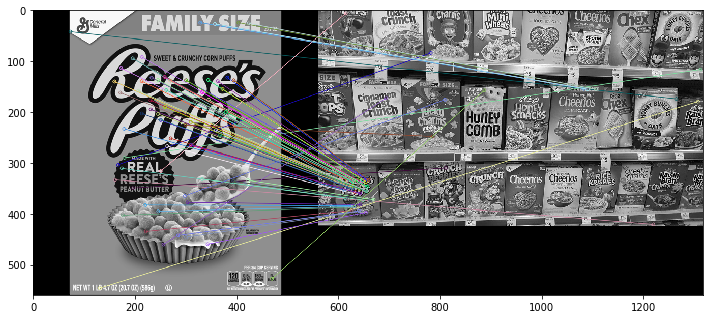

In [20]:
display(sift_matches)

In [30]:
sift=cv2.xfeatures2d.SIFT_create()

In [31]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [32]:
#FLANN-FAST LIBRARY FOR APPROX NEAREST NEIGHBOURS-- FINDS GENERAL GOOD MATCHES NOT BEST BUT FASTWER THAN APPROX GOOD NEIGHBOURS
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm= FLANN_INDEX_KDTREE,tree=5)
search_params=dict(checks=50)

In [33]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [34]:
matches=flann.knnMatch(des1,des2,k=2)

In [35]:
matchesMask=[[0,0] for i in range(len(matches))]

In [37]:
good=[]

for i,( match1, match2) in enumerate( matches):
    if match1.distance<0.75*match2.distance:
        matchesMask[i]=[1,0]

In [53]:
draw_params=dict(matchColor=(0,255,0), singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

In [54]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

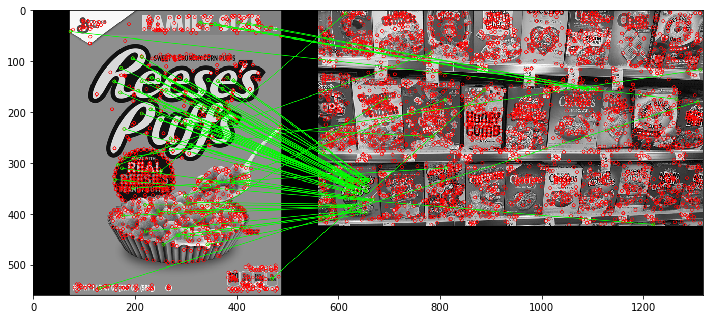

In [55]:
display(flann_matches)